Extra Credit Lab - Lily Williams, Ally O'Shea. DS 3001: Foundations of Machine Learning

In [2]:

import numpy as np
import pandas as pd
#load the 11 columns, 9 of data,then ID which is a good classifier and year which will help for graphs over time
df = pd.read_excel("/GSS_NEW.xlsx")
print(df.head())
print(df.describe())


   year  id_            wrkstat               hrs1        marital age  \
0  1972    1  Working full time  .i:  Inapplicable  Never married  23   
1  1972    2            Retired  .i:  Inapplicable        Married  70   
2  1972    3  Working part time  .i:  Inapplicable        Married  48   
3  1972    4  Working full time  .i:  Inapplicable        Married  27   
4  1972    5      Keeping house  .i:  Inapplicable        Married  61   

                 educ     sex            rincome           polviews  \
0  4 years of college  FEMALE  .i:  Inapplicable  .i:  Inapplicable   
1          10th grade    MALE  .i:  Inapplicable  .i:  Inapplicable   
2          12th grade  FEMALE  .i:  Inapplicable  .i:  Inapplicable   
3  5 years of college  FEMALE  .i:  Inapplicable  .i:  Inapplicable   
4          12th grade  FEMALE  .i:  Inapplicable  .i:  Inapplicable   

           happy  
0  Not too happy  
1  Not too happy  
2   Pretty happy  
3  Not too happy  
4   Pretty happy  
               year 

The first step after loading the data is cleaning each of the 8 variables so that it can better be used for EDA. Look at each variable one at at ime and decide what the best way to clean it is.

In [3]:
#convert to excel to make it easier to work with
df.to_csv('gss_data.csv', index=False)
#first I have information about each of the options for each question - but good to double check exact wording they are encoded with
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))



# Noticed MISSING data patterns, inapplicable, no answer, do not know/cannot choose, skipped on web, refused
# Define missing codes
missing_codes = ['.i:  Inapplicable', '.n:  No answer',
                 '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web',
                 '.r:  Refused']

#2. Work status
#There are a few missing values that are Skipped on Web OR do not know/ cannot choose. The responses other than waht is missing are good and can be interpreted                                                             11
df['wrkstat_clean'] = df['wrkstat'].replace(missing_codes, np.nan)
# 3. HRS1 Convert to numeric
# Remove the inapplicable/missing, convert rest to numbers
print(df['hrs1'].dtype)
df['hrs1_clean'] = df['hrs1'].replace(missing_codes, np.nan)
df['hrs1_clean'] = pd.to_numeric(df['hrs1_clean'], errors='coerce')

# 4. AGE  onvert to numeric
df['age_clean'] = df['age'].replace(missing_codes, np.nan)
df['age_clean'] = pd.to_numeric(df['age_clean'], errors='coerce')

# 5. EDUC Convert to years of education and get rid of the words after the years
educ_map = {
    'No formal schooling': 0,
    '1st grade': 1, '2nd grade': 2, '3rd grade': 3, '4th grade': 4,
    '5th grade': 5, '6th grade': 6, '7th grade': 7, '8th grade': 8,
    '9th grade': 9, '10th grade': 10, '11th grade': 11, '12th grade': 12,
    '1 year of college': 13, '2 years of college': 14,
    '3 years of college': 15, '4 years of college': 16,
    '5 years of college': 17, '6 years of college': 18,
    '7 years of college': 19, '8 or more years of college': 20
}
df['educ_years'] = df['educ'].map(educ_map)

# 6. SEX, cleaning just replace missing
df['sex_clean'] = df['sex'].replace(missing_codes, np.nan)

#7. INCOME Use midpoints to avoid having to deal with income categories/ranges
income_map = {
    'LT $1000': 500, '$1000 TO 2999': 2000, '$3000 TO 3999': 3500,
    '$4000 TO 4999': 4500, '$5000 TO 5999': 5500, '$6000 TO 6999': 6500,
    '$7000 TO 7999': 7500, '$8000 TO 9999': 9000, '$10000 - 14999': 12500,
    '$15000 - 19999': 17500, '$20000 - 24999': 22500, '$25000 OR MORE': 30000
}
df['income_numeric'] = df['rincome'].map(income_map)

# 8. HAPPY, MARITAL, POLVIEWS - Keep categorical but clean
#up all the missings
df['happy_clean'] = df['happy'].replace(missing_codes, np.nan)
df['marital_clean'] = df['marital'].replace(missing_codes, np.nan)
df['polviews_clean'] = df['polviews'].replace(missing_codes, np.nan)

# . Check  work by prining everything and clean vars
print("\\n Cleaned Variables")
print(f"Total rows: {len(df)}")
print(f"\\nHours worked - missing: {df['hrs1_clean'].isna().sum()} ({df['hrs1_clean'].isna().sum()/len(df)*100:.1f}%)")
print(f"Age - missing: {df['age_clean'].isna().sum()} ({df['age_clean'].isna().sum()/len(df)*100:.1f}%)")
print(f"Education - missing: {df['educ_years'].isna().sum()} ({df['educ_years'].isna().sum()/len(df)*100:.1f}%)")
print(f"Income - missing: {df['income_numeric'].isna().sum()} ({df['income_numeric'].isna().sum()/len(df)*100:.1f}%)")

df.head()


year:
year
2006    4510
2021    4032
2022    3544
2024    3309
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: count, dtype: int64

id_:
id_
1372    35
1371    35
1370    35
1369    35
1368    35
        ..
4434     1
4481     1
4508     1
4509     1
4510     1
Name: count, Length: 4510, dtype: int64

wrkstat:
wrkstat
Working full time                                                             36727
Retired                                                                       11683
Keeping house                                                                 11061
Working part time                                                 

,year,id_,wrkstat,hrs1,marital,age,educ,sex,rincome,polviews,happy,wrkstat_clean,hrs1_clean,age_clean,educ_years,sex_clean,income_numeric,happy_clean,marital_clean,polviews_clean
0,1972,1,Working full time,.i: Inapplicable,Never married,23,4 years of college,FEMALE,.i: Inapplicable,.i: Inapplicable,Not too happy,Working full time,NaN,23.0,16.0,FEMALE,NaN,Not too happy,Never married,NaN
1,1972,2,Retired,.i: Inapplicable,Married,70,10th grade,MALE,.i: Inapplicable,.i: Inapplicable,Not too happy,Retired,NaN,70.0,10.0,MALE,NaN,Not too happy,Married,NaN
2,1972,3,Working part time,.i: Inapplicable,Married,48,12th grade,FEMALE,.i: Inapplicable,.i: Inapplicable,Pretty happy,Working part time,NaN,48.0,12.0,FEMALE,NaN,Pretty happy,Married,NaN
3,1972,4,Working full time,.i: Inapplicable,Married,27,5 years of college,FEMALE,.i: Inapplicable,.i: Inapplicable,Not too happy,Working full time,NaN,27.0,17.0,FEMALE,NaN,Not too happy,Married,NaN
4,1972,5,Keeping house,.i: Inapplicable,Married,61,12th grade,FEMALE,.i: Inapplicable,.i: Inapplicable,Pretty happy,Keeping house,NaN,61.0,12.0,FEMALE,NaN,Pretty happy,Married,NaN


To clean each variable:
1. Work Status (wrkstat): There are a few missing values - some people skipped on web or said "do not know/cannot choose". The actual responses are already clean and easy to interpret so I just replaced the missing codes with NaN.
2. Hours Worked (hrs1): This one was a little bit trickier the column had both numbers (40, 50, etc.) and text (".i: Inapplicable") so Python was treating everything as strings. First I replaced all the missing codes with NaN, then converted the remaining values to actual numbers so I can analyze them later.
3. Age: Same issue as hrs1 - mixed text and numbers. Replaced missing codes and converted to numeric so I can calculate averages and stuff.
4. Education (educ): The original data had stuff like "12th grade" and "4 years of college" which is annoying to work with. I converted everything to years of education (0-20) so it's just one number I can analyze. 12th grade = 12 years, 4 years of college = 16 years, etc.
5. Sex: Pretty straightforward - just removed the missing data codes.
6. Income (rincome): This was kind of a pain because the original data had ranges like "$10000 - 14999". I converted each range to its midpoint so I have an actual number to work with. For example "$10000 - 14999" becomes 12500. For "$25000 OR MORE" I just used 30000 since idk what the upper bound is.
Happiness, Marital Status, Political Views: These are all categorical so I'm keeping them as text, just removing the missing data codes.


# Visualization

In [4]:
print(df.columns)

Index(['year', 'id_', 'wrkstat', 'hrs1', 'marital', 'age', 'educ', 'sex',
       'rincome', 'polviews', 'happy', 'wrkstat_clean', 'hrs1_clean',
       'age_clean', 'educ_years', 'sex_clean', 'income_numeric', 'happy_clean',
       'marital_clean', 'polviews_clean'],
      dtype='object')


**Question 1:** If you have a higher education level, can you work fewer hours and still have a high income?

Summary of Hours Worked by Education Level:
             count       mean
educ_years                  
0.0            52  37.923077
1.0            19  40.842105
2.0            56  39.946429
3.0            72  35.791667
4.0            92  38.065217
5.0            95  37.989474
6.0           315  38.860317
7.0           280  37.064286
8.0           759  38.836627
9.0           889  39.071991
10.0         1205  38.597510
11.0         1805  39.079778
12.0        12418  40.310598
13.0         3795  39.754150
14.0         5472  41.397844
15.0         2099  40.254883
16.0         7273  41.908016
17.0         1777  41.845245
18.0         2233  41.888491
19.0          834  42.961631
20.0         1364  44.309384
Summary of Income by Education Level:
             count          mean
educ_years                     
0.0            41  15426.829268
1.0            16  14656.250000
2.0            53  18801.886792
3.0            67  13485.074627
4.0            82  10981.707317
5.0            96  11317.

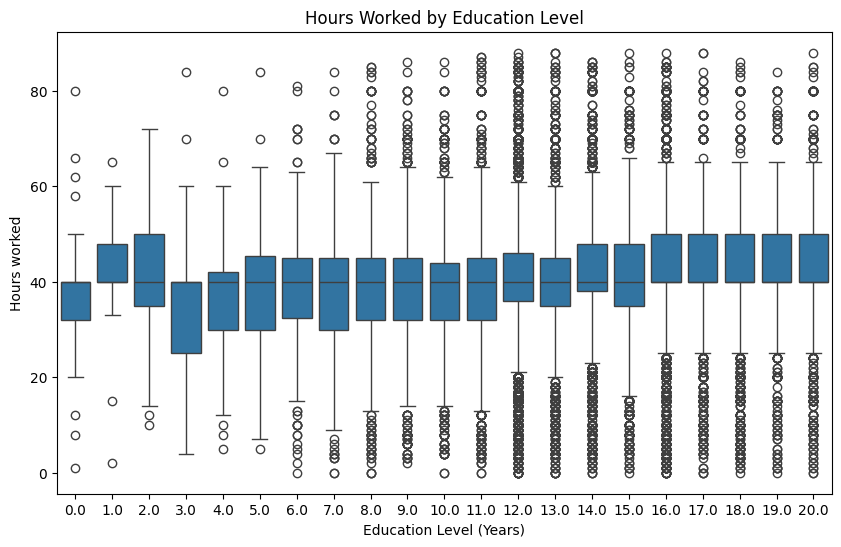

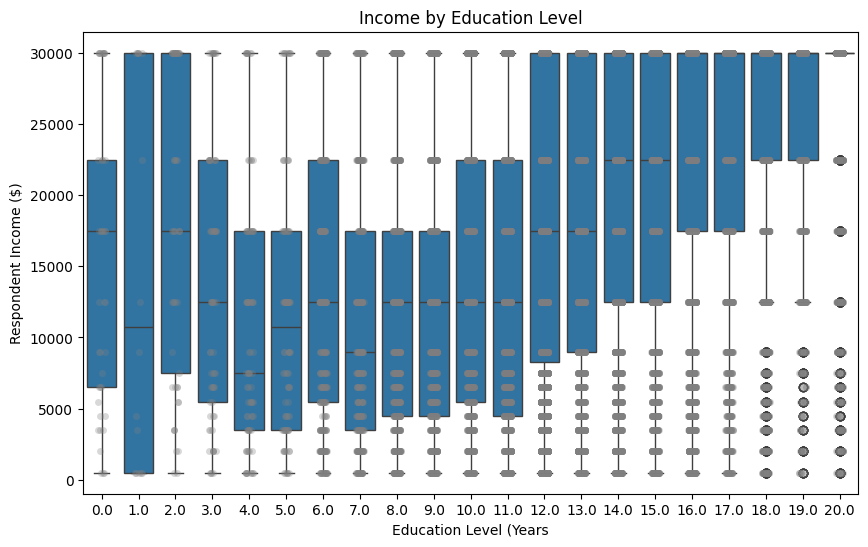

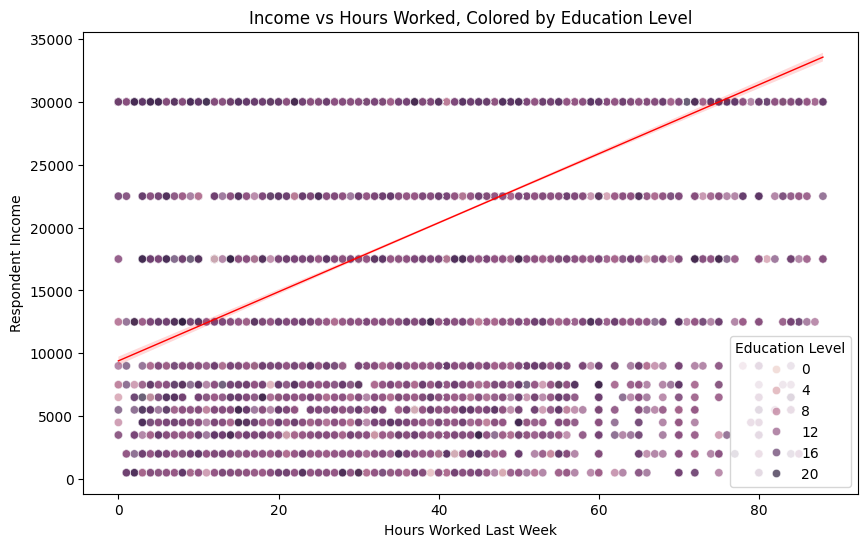

Spearman correlation between hours worked and income: 0.36


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#edu_summary = df.groupby('educ_years')[['income_numeric', 'hrs1_clean']].mean()
#print(edu_summary.head(15))
#print(df[['educ_years', 'income_numeric', 'hrs1_clean']].corr())

## Education vs hours worked
plt.figure(figsize=(10,6))
sns.boxplot(x='educ_years',y='hrs1_clean',data=df)
plt.title('Hours Worked by Education Level')
plt.xlabel('Education Level (Years)')
plt.ylabel('Hours worked')
plt.show
# numeric summary
hours_summary = df.groupby('educ_years')['hrs1_clean'].agg(['count', 'mean',  'median', 'std', 'min', 'max'])
print("Summary of Hours Worked by Education Level:\n", hours_summary)

## Education vs income
plt.figure(figsize=(10,6))
sns.boxplot(x='educ_years',y='income_numeric',data=df)
sns.stripplot(x='educ_years', y='income_numeric', data=df, color='gray', alpha=0.3, jitter=True)
plt.title('Income by Education Level')
plt.xlabel('Education Level (Years')
plt.ylabel('Respondent Income ($)')
plt.show
# numeric summary
income_sum = df.groupby('educ_years')['income_numeric'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("Summary of Income by Education Level:\n", income_sum)

## Hours worked vs income, colored by education
plt.figure(figsize=(10,6))
sns.scatterplot(x='hrs1_clean', y='income_numeric', hue='educ_years', data=df, alpha=0.7)
sns.regplot(x='hrs1_clean', y='income_numeric', data=df, scatter=False, color='red', line_kws={"linewidth":1})
plt.title('Income vs Hours Worked, Colored by Education Level')
plt.xlabel('Hours Worked Last Week')
plt.ylabel('Respondent Income')
plt.legend(title='Education Level')
plt.show()
# Numeric summary: correlation between hours worked and income
corr_hours_income = df['hrs1_clean'].corr(df['income_numeric'], method='spearman')
print(f"Spearman correlation between hours worked and income: {corr_hours_income:.2f}")

**Question 2:** Does marital status affect how many hours someone works?”

Summary of income by marital status:
                count          mean   median           std    min      max
marital_clean                                                            
Divorced        6624  21582.729469  30000.0   9796.966225  500.0  30000.0
Married        23164  20531.492834  22500.0  10405.161122  500.0  30000.0
Never married  11318  17899.717265  17500.0  10892.648461  500.0  30000.0
Separated       1501  17634.243837  17500.0  10583.893419  500.0  30000.0
Widowed         1586  16371.374527  12500.0  10926.879438  500.0  30000.0


<function matplotlib.pyplot.show(close=None, block=None)>

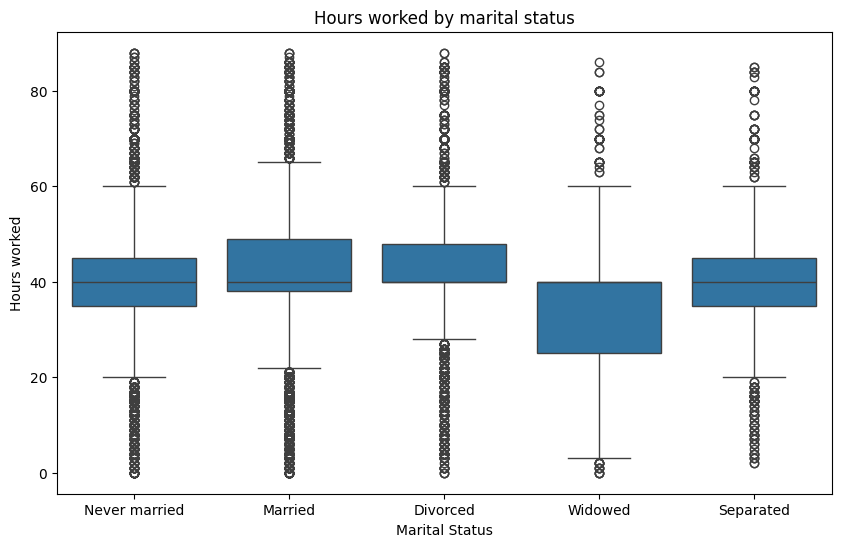

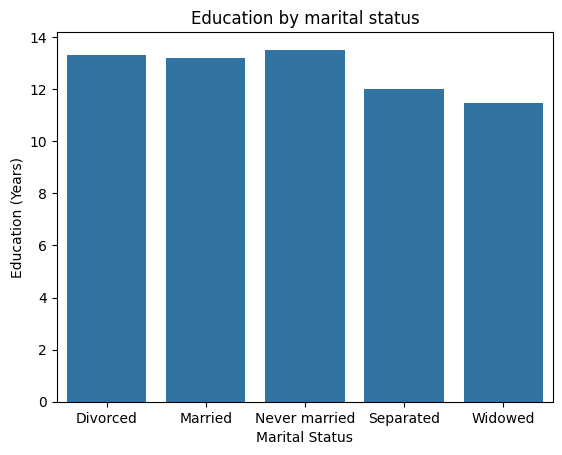

In [8]:
## Marital status
plt.figure(figsize=(10,6))
sns.boxplot(x='marital_clean',y='hrs1_clean', data=df)
plt.title('Hours worked by marital status')
plt.xlabel('Marital Status')
plt.ylabel('Hours worked')
plt.show
marital_income = df.groupby('marital_clean')['income_numeric'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print("Summary of income by marital status:\n", marital_income)


avg_edu=df.groupby('marital_clean')['educ_years'].mean().reset_index()
plt.figure()
sns.barplot(x='marital_clean',y='educ_years', data=avg_edu)
plt.title('Education by marital status')
plt.xlabel('Marital Status')
plt.ylabel('Education (Years)')
plt.show

**Question 3:** Does income, education, work hours, or marital status correlate with how happy people report being?

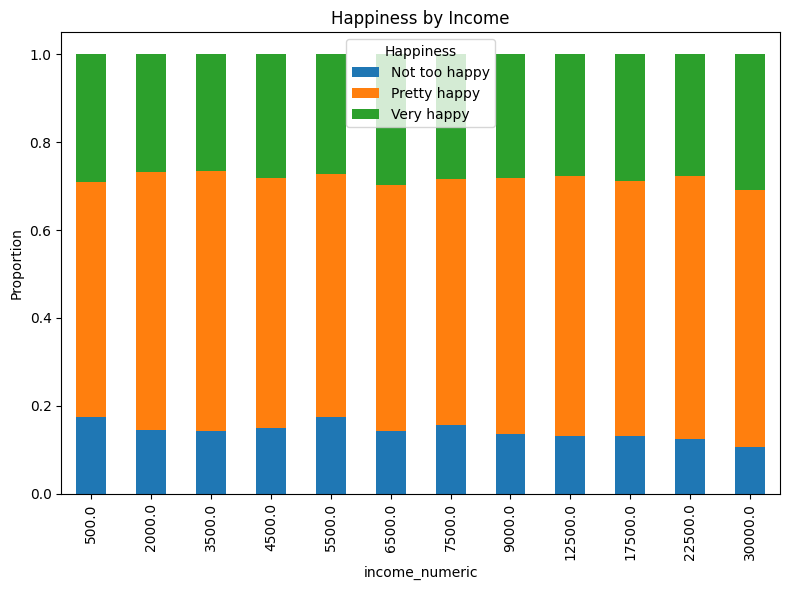

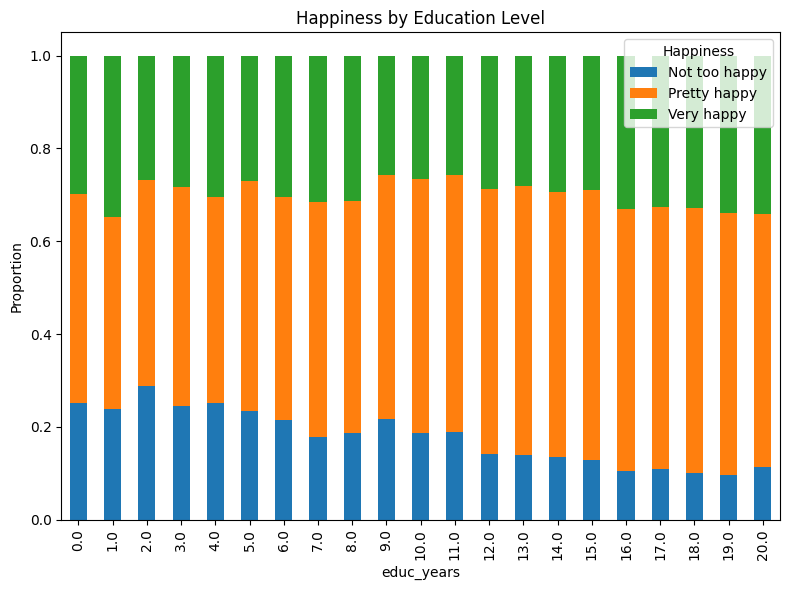

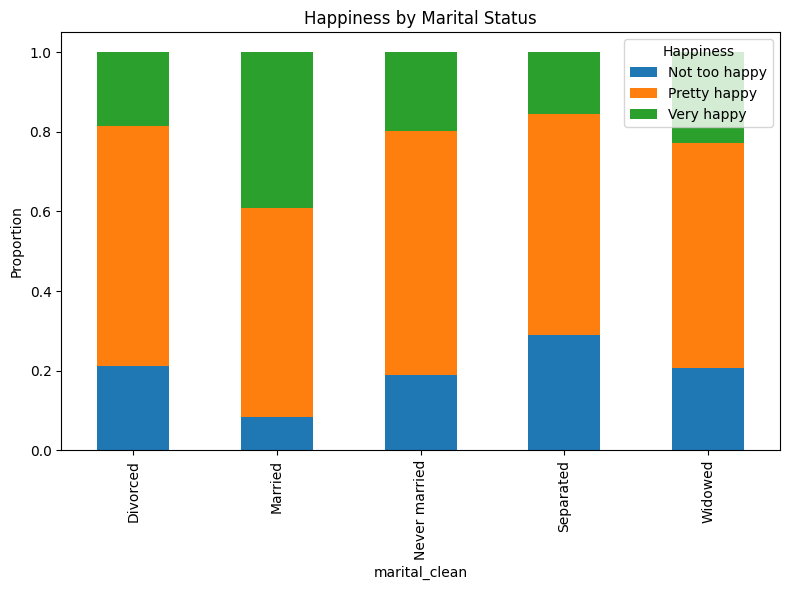

In [9]:
# use distributions, proportions, medians, and rank correlations
### income --> happiness: stacked bar chart
# as income increases, does the proportion of very happy increase?

### Education --> happiness: stacked bar chart
#

### Work hours --> happiness:
def stacked_prop_plot(df, x_var, title):
    prop = pd.crosstab(df[x_var], df['happy_clean'], normalize='index')

    prop.plot(
        kind='bar',
        stacked=True,
        figsize=(8, 6)
    )

    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel('Proportion')
    plt.legend(title='Happiness')
    plt.tight_layout()
    plt.show()
# Income vs happiness
stacked_prop_plot(df, 'income_numeric', 'Happiness by Income')
# Education vs happiness
stacked_prop_plot(df, 'educ_years', 'Happiness by Education Level')
# Marital status vs happiness
stacked_prop_plot(df, 'marital_clean', 'Happiness by Marital Status')


**Question 5:** How have political parties changed over time i.e. how has like a liberals average education level or income changed over time?

Index(['year', 'id_', 'wrkstat', 'hrs1', 'marital', 'age', 'educ', 'sex',
       'rincome', 'polviews', 'happy', 'wrkstat_clean', 'hrs1_clean',
       'age_clean', 'educ_years', 'sex_clean', 'income_numeric', 'happy_clean',
       'marital_clean', 'polviews_clean'],
      dtype='object')
polviews_clean
Moderate, middle of the road    25140
Slightly conservative            9977
Conservative                     9877
Slightly liberal                 8268
Liberal                          8044
Extremely conservative           2351
Extremely liberal                2221
Name: count, dtype: int64


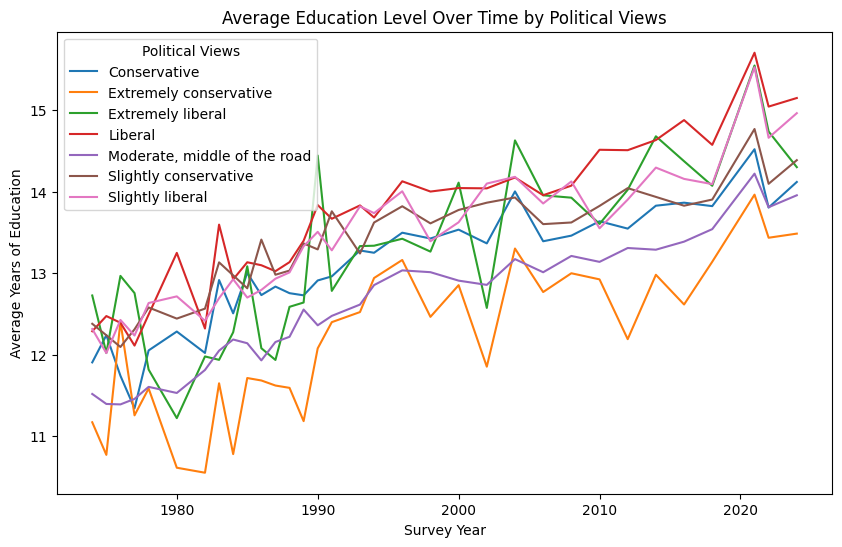

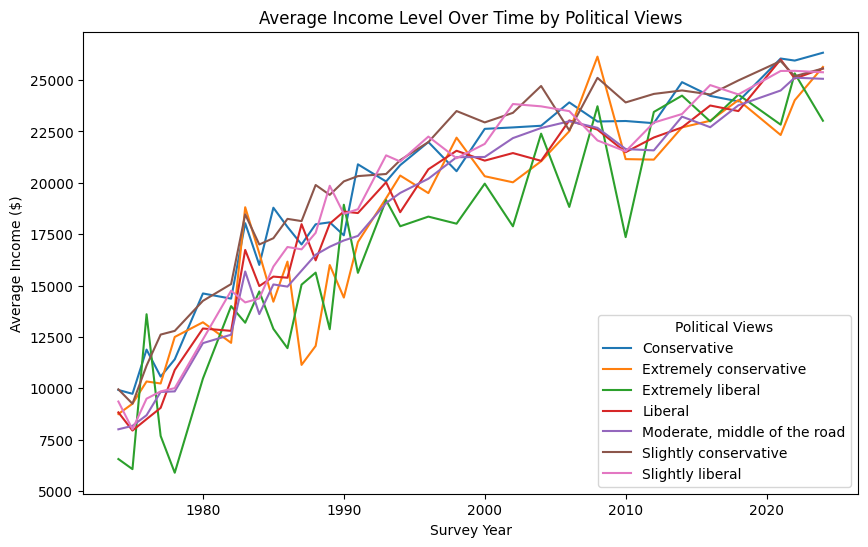

In [11]:
print(df.columns)
party_counts = df['polviews_clean'].value_counts()
print(party_counts)
edu_poltrend = (
    df.groupby(['year', 'polviews_clean'])['educ_years']
      .mean()
      .reset_index()
)
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=edu_poltrend,
    x='year',
    y='educ_years',
    hue='polviews_clean'
)
plt.title('Average Education Level Over Time by Political Views')
plt.xlabel('Survey Year')
plt.ylabel('Average Years of Education')
plt.legend(title='Political Views')
plt.show()

edu_incometrend = (
    df.groupby(['year', 'polviews_clean'])['income_numeric']
      .mean()
      .reset_index()
)
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=edu_incometrend,
    x='year',
    y='income_numeric',
    hue='polviews_clean'
)
plt.title('Average Income Level Over Time by Political Views')
plt.xlabel('Survey Year')
plt.ylabel('Average Income ($)')
plt.legend(title='Political Views')
plt.show()


**Question 6:**